# &emsp;&emsp;&emsp;Attendance-Management-System Using Face-Recognition-CNN

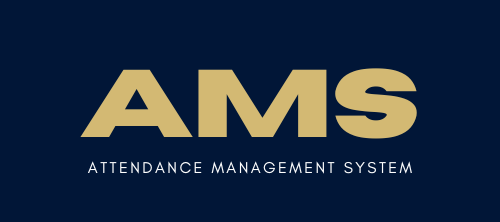

### Create Conda Environment<br/>
------------------------------------<br/>
conda create -n myenv001 python==3.9<br/>
conda env list<br/>
conda activate myenv001<br/>
pip3 install jupyter notebook<br/>

### Install Library<br/>
------------------------------------<br/>
pip install tensorflow<br/>
pip install opencv-python<br/>
pip install keras_vggface<br/>
pip install keras_applications<br/>
pip install keras_preprocessing<br/>
pip install h5py<br/>
pip install pandas<br/>
pip install matplotlib<br/>
conda install scikit-learn<br/>
pip install seaborn<br/>

### See Version<br/>
------------------------------------<br/>
import numpy as tf<br/>
print(tf.__version__)<br/>

### For Debugging Error<br/>
------------------------------------<br/>
from keras.engine.topology import get_source_inputs<br/>
&nbsp;&ensp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;to<br/>
from keras.utils.layer_utils import get_source_inputs<br/>
Location Sample: usr/local/lib/python3.7/dist-packages/keras_vggface/models.py<br/><br/>
conda uninstall PIL
conda uninstall Pillow
conda install Pillow
    
### using Folder in Google Colab<br/>
------------------------------------<br/>
!unzip Headshots.zip<br/>

-------------------------------------------------------------------------------------------------------------

# --------------------------------------------------Model---------------------------------------------------

------------------------------------------------------------

### Import library

In [1]:
import os
import pandas as pd
import numpy as np
import tensorflow.keras as keras
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

### Data Preprocessing

In [2]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                   rotation_range=20,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

train_generator = train_datagen.flow_from_directory('C:/Users/user/Desktop/2023/PRJ303/AMS/data/First Year/BScITB',
                                                    target_size=(224,224),
                                                    color_mode='rgb',
                                                    batch_size=128,
                                                    class_mode='categorical',
                                                    shuffle=True)


Found 889 images belonging to 5 classes.


In [3]:
train_generator.class_indices.values()
#dict_values([0, 1, 2])
NO_CLASSES = len(train_generator.class_indices.values())
print(train_generator.class_indices)

{'Sonam Pelki': 0, 'Sonam Tshering': 1, 'Tshewang Norbu': 2, 'Ugyen Lhamo': 3, 'Ugyen Tashi': 4}


In [4]:
from keras_vggface.vggface import VGGFace
base_model = VGGFace(include_top=True,model='vgg16',input_shape=(224, 224, 3))
base_model.summary()

print(len(base_model.layers))
# 26 layers in the original VGG-Face

Model: "vggface_vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1_1 (Conv2D)            (None, 224, 224, 64)      1792      
                                                                 
 conv1_2 (Conv2D)            (None, 224, 224, 64)      36928     
                                                                 
 pool1 (MaxPooling2D)        (None, 112, 112, 64)      0         
                                                                 
 conv2_1 (Conv2D)            (None, 112, 112, 128)     73856     
                                                                 
 conv2_2 (Conv2D)            (None, 112, 112, 128)     147584    
                                                                 
 pool2 (MaxPooling2D)        (None, 56, 56, 128)     

In [5]:
base_model = VGGFace(include_top=False,
                     model='vgg16',
                     input_shape=(224, 224, 3))
base_model.summary()
print(len(base_model.layers))
# 19 layers after excluding the last few layers

Model: "vggface_vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1_1 (Conv2D)            (None, 224, 224, 64)      1792      
                                                                 
 conv1_2 (Conv2D)            (None, 224, 224, 64)      36928     
                                                                 
 pool1 (MaxPooling2D)        (None, 112, 112, 64)      0         
                                                                 
 conv2_1 (Conv2D)            (None, 112, 112, 128)     73856     
                                                                 
 conv2_2 (Conv2D)            (None, 112, 112, 128)     147584    
                                                                 
 pool2 (MaxPooling2D)        (None, 56, 56, 128)     

In [6]:
from keras.layers import GlobalAveragePooling2D, Dense
from keras.models import Model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)

# final layer with softmax activation
preds = Dense(NO_CLASSES, activation='softmax')(x)

### Creating New Model

In [7]:
# create a new model with the base model's original input and the 
# new model's output
model = Model(inputs = base_model.input, outputs = preds)
model.summary()

# don't train the first 19 layers - 0..18
for layer in model.layers[:19]:
    layer.trainable = False

# train the rest of the layers - 19 onwards
for layer in model.layers[19:]:
    layer.trainable = True


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1_1 (Conv2D)            (None, 224, 224, 64)      1792      
                                                                 
 conv1_2 (Conv2D)            (None, 224, 224, 64)      36928     
                                                                 
 pool1 (MaxPooling2D)        (None, 112, 112, 64)      0         
                                                                 
 conv2_1 (Conv2D)            (None, 112, 112, 128)     73856     
                                                                 
 conv2_2 (Conv2D)            (None, 112, 112, 128)     147584    
                                                                 
 pool2 (MaxPooling2D)        (None, 56, 56, 128)       0     

### Training model

In [8]:
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [9]:
from PIL import Image
history = model.fit(train_generator,
                    batch_size = 128,
                    validation_data = train_generator,
                    validation_steps=len(train_generator),
                    verbose = 1,
                    epochs = 20)


Epoch 1/20
7/7 [==============================] - 203s 30s/step - loss: 1.1629 - accuracy: 0.5028 - val_loss: 0.5254 - val_accuracy: 0.9078
Epoch 2/20
7/7 [==============================] - 187s 29s/step - loss: 0.2273 - accuracy: 0.9775 - val_loss: 0.0353 - val_accuracy: 0.9966
Epoch 3/20
7/7 [==============================] - 187s 29s/step - loss: 0.0167 - accuracy: 0.9955 - val_loss: 0.0052 - val_accuracy: 0.9989
Epoch 4/20
7/7 [==============================] - 187s 29s/step - loss: 0.0029 - accuracy: 0.9989 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 5/20
7/7 [==============================] - 188s 29s/step - loss: 5.1010e-04 - accuracy: 1.0000 - val_loss: 0.0024 - val_accuracy: 0.9989
Epoch 6/20
7/7 [==============================] - 189s 29s/step - loss: 0.0027 - accuracy: 0.9989 - val_loss: 5.2469e-04 - val_accuracy: 1.0000
Epoch 7/20
7/7 [==============================] - 187s 29s/step - loss: 0.0094 - accuracy: 0.9989 - val_loss: 0.0035 - val_accuracy: 0.9989
Epoch 8/20
7

### Save Model

In [10]:
# creates a HDF5 file
model.save('transfer_learning_trained' + '_face_cnn_model.h5')


In [11]:
from tensorflow.keras.models import load_model

# deletes the existing model
del model

# returns a compiled model identical to the previous one
model = load_model('transfer_learning_trained' + '_face_cnn_model.h5')


### Label the Model

In [12]:
import pickle

class_dictionary = train_generator.class_indices
class_dictionary = {value:key for key, value in class_dictionary.items()}
print(class_dictionary)

{0: 'Sonam Pelki', 1: 'Sonam Tshering', 2: 'Tshewang Norbu', 3: 'Ugyen Lhamo', 4: 'Ugyen Tashi'}


In [13]:
# save the class dictionary to pickle
face_label_filename = 'face-labels.pickle'
with open(face_label_filename, 'wb') as f: pickle.dump(class_dictionary, f)


In [14]:
import cv2
import os
import pickle
import numpy as np
import pickle

from PIL import Image
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras_vggface import utils

# dimension of images
image_width = 224
image_height = 224

# load the training labels
face_label_filename = 'face-labels.pickle'
with open(face_label_filename, "rb") as f: class_dictionary = pickle.load(f)

class_list = [value for _, value in class_dictionary.items()]
print(class_list)


['Sonam Pelki', 'Sonam Tshering', 'Tshewang Norbu', 'Ugyen Lhamo', 'Ugyen Tashi']


### Testing

In [23]:
from sklearn.metrics import confusion_matrix

# Evaluate model on test data
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                  rotation_range=20,
                                  width_shift_range=0.1,
                                  height_shift_range=0.1,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest')
test_generator = test_datagen.flow_from_directory('C:/Users/user/Desktop/2023/PRJ303/AMS/facetest/BScITB',
                                                  target_size=(224,224),
                                                  color_mode='rgb',
                                                  batch_size=64,
                                                  class_mode='categorical',
                                                  shuffle=False)

score = model.evaluate(test_generator, verbose=0)

Found 100 images belonging to 5 classes.


### Confusion_Matrix

In [24]:
print('Test loss:', score[0])

Test loss: 0.10725841671228409


In [25]:
print('Test accuracy:', score[1])

Test accuracy: 0.9300000071525574


[INFO] evaluating the model...
2/2 [==============================] - 21s 4s/step
                precision    recall  f1-score   support

   Sonam Pelki       1.00      1.00      1.00        20
Sonam Tshering       1.00      0.85      0.92        20
Tshewang Norbu       0.87      1.00      0.93        20
   Ugyen Lhamo       1.00      1.00      1.00        20
   Ugyen Tashi       1.00      1.00      1.00        20

      accuracy                           0.97       100
     macro avg       0.97      0.97      0.97       100
  weighted avg       0.97      0.97      0.97       100



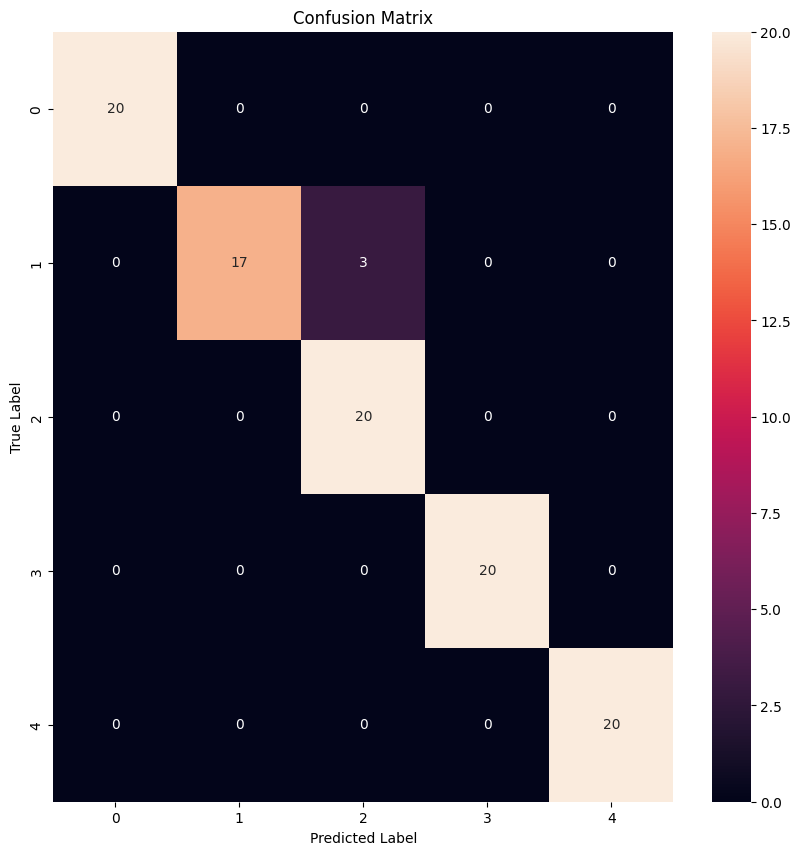

In [26]:
from sklearn.metrics import classification_report
import seaborn as sns

print("[INFO] evaluating the model...")
test_generator.reset()
plt.figure(figsize=(10,10))
predIdxs = model.predict(test_generator, steps = len(test_generator))
predIdxs = np.argmax(predIdxs, axis=1)
matrix = confusion_matrix(test_generator.classes, predIdxs)
sns.heatmap(matrix, annot=True, cbar=True, fmt='d')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')

print(classification_report(test_generator.classes, predIdxs, target_names=test_generator.class_indices.keys()))

In [27]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [28]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

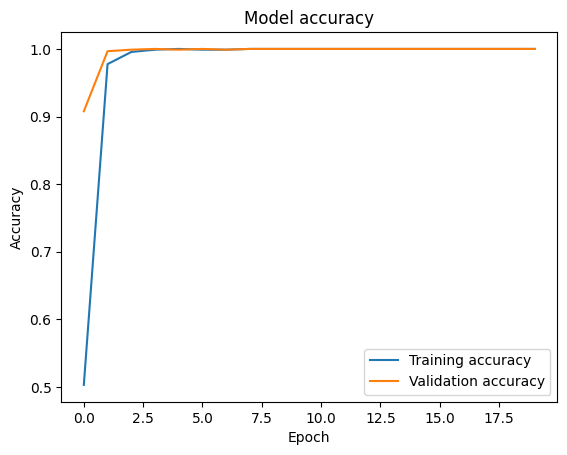

In [31]:
# Plot training and validation accuracy
plt.plot(acc, label='Training accuracy')
plt.plot(val_acc, label='Validation accuracy')
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

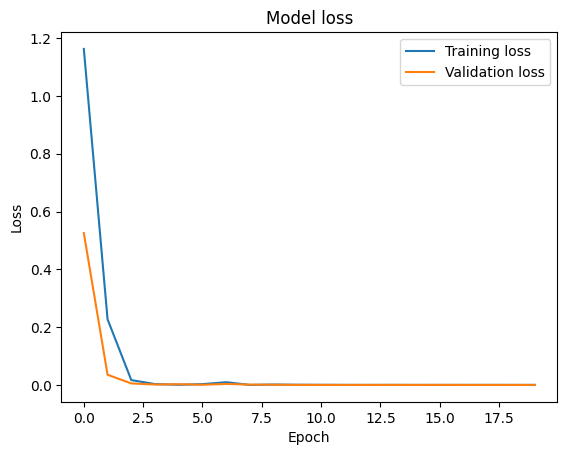

In [30]:
# Plot training and validation loss
plt.plot(loss, label='Training loss')
plt.plot(val_loss, label='Validation loss')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Attendance Test

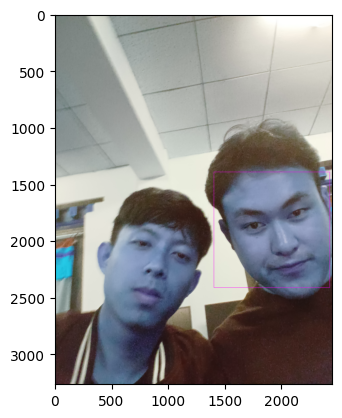

1/1 [==============================] - 0s 183ms/step
Predicted face: Sonam Tshering



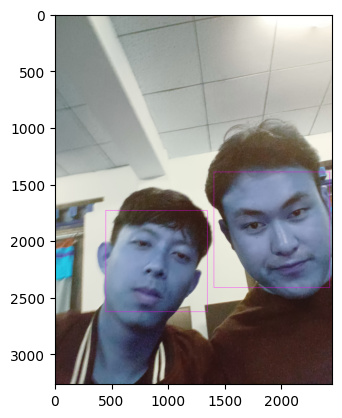

1/1 [==============================] - 0s 249ms/step
Predicted face: Sonam Pelki



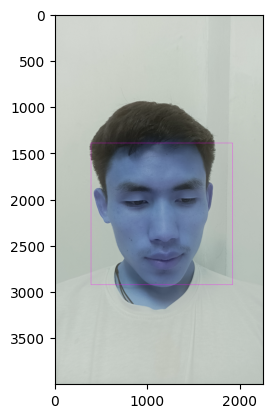

1/1 [==============================] - 0s 212ms/step
Predicted face: Tshewang Norbu



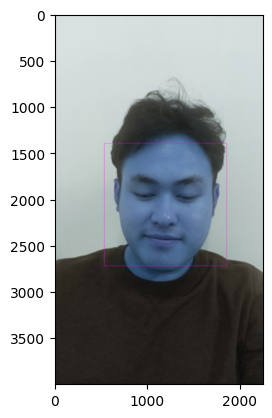

1/1 [==============================] - 0s 164ms/step
Predicted face: Sonam Tshering



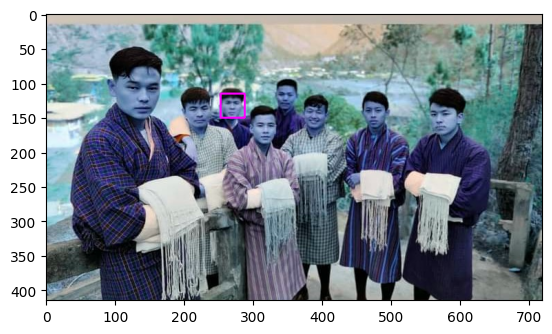

1/1 [==============================] - 0s 166ms/step
Unknown



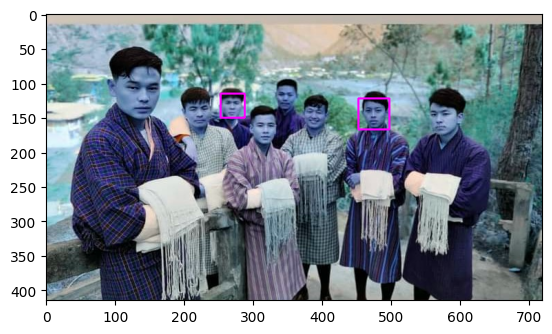

1/1 [==============================] - 0s 156ms/step
Predicted face: Sonam Pelki



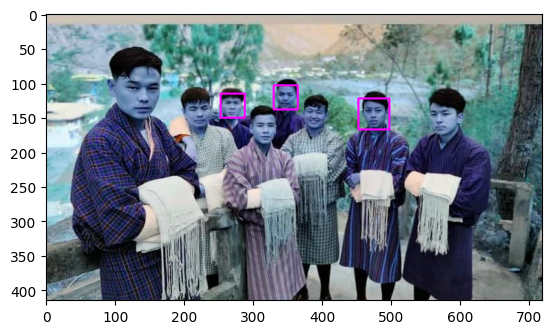

1/1 [==============================] - 0s 214ms/step
Predicted face: Sonam Tshering



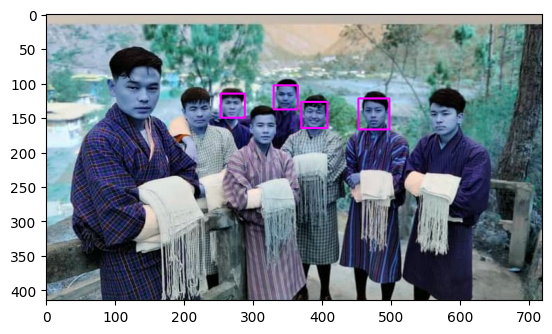

1/1 [==============================] - 0s 175ms/step
Predicted face: Tshewang Norbu



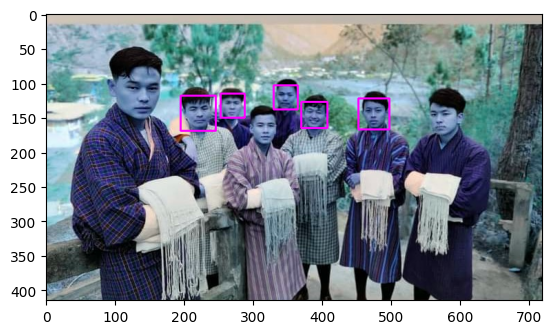

1/1 [==============================] - 0s 167ms/step
Predicted face: Ugyen Tashi



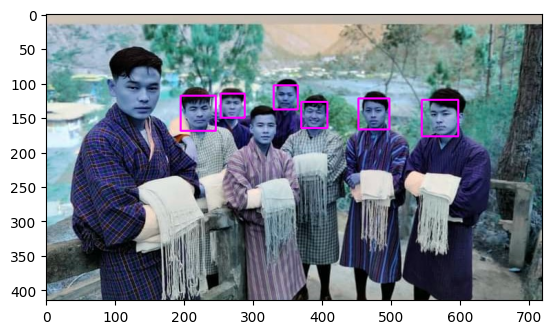

1/1 [==============================] - 0s 148ms/step
Predicted face: Sonam Tshering



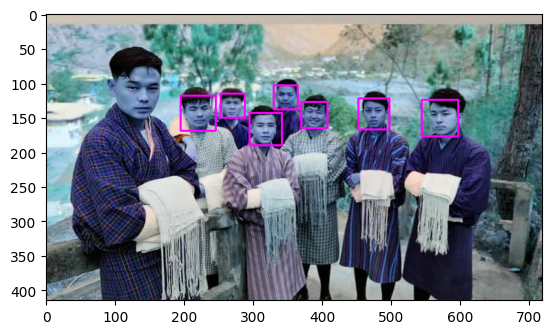

1/1 [==============================] - 0s 176ms/step
Predicted face: Sonam Tshering



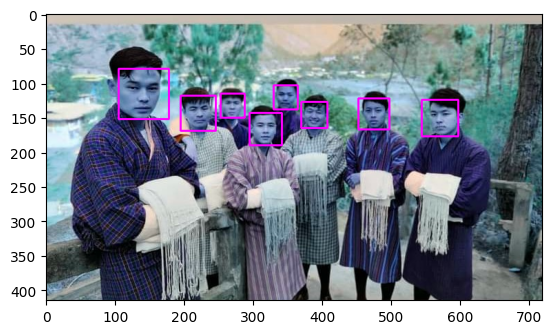

1/1 [==============================] - 0s 197ms/step
Predicted face: Ugyen Tashi



In [57]:

from tensorflow.keras.preprocessing.image import img_to_array

facecascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

for i in range(1,5): 
    test_image_filename = f'./Detection/New folder/face ({i}).jpg'

# load the image
    imgtest = cv2.imread(test_image_filename, cv2.IMREAD_COLOR)
    if imgtest is not None:
    # Convert image to numpy array
        image_array = np.array(imgtest, dtype=np.uint8)

    # Continue with face detection
        pass
    else:
        print("Error: Could not load image.")
# get the faces detected in the image
    faces = facecascade.detectMultiScale(imgtest, scaleFactor=1.1, minNeighbors=5)
    for (x_, y_, w, h) in faces:
    # draw the face detected
        face_detect = cv2.rectangle(imgtest, (x_, y_), (x_+w, y_+h), (255, 0, 255), 2)
        plt.imshow(face_detect)
        plt.show()

    # resize the detected face to 224x224
        size = (image_width, image_height)
        roi = image_array[y_: y_ + h, x_: x_ + w]
        resized_image = cv2.resize(roi, size)

    # prepare the image for prediction
        #x = image.img_to_array(resized_image)
        x = img_to_array(resized_image)
        x = np.expand_dims(x, axis=0)
        x = utils.preprocess_input(x, version=1)

    # making prediction
        predicted_prob = model.predict(x)
        if predicted_prob[0].max() >= 1:
            predicted_class = class_list[predicted_prob[0].argmax()]
            print(f"Predicted face: {predicted_class}")
        else:
            print("Unknown")
        print("============================\n")




### Webcam Test

In [58]:
from PIL import Image
import numpy as np
import cv2
import pickle
from tensorflow.keras.models import load_model

# for face detection
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# resolution of the webcam
screen_width = 640     # try 640 if code fails
screen_height = 480

# size of the image to predict
image_width = 224
image_height = 224

# load the trained model
model = load_model('transfer_learning_trained_face_cnn_model.h5')

# the labels for the trained model
with open("face-labels.pickle", 'rb') as f:
    og_labels = pickle.load(f)
    labels = {key:value for key,value in og_labels.items()}
    print(labels)

# default webcam
stream = cv2.VideoCapture(1)

while(True):
    # Capture frame-by-frame
    (grabbed, frame) = stream.read()
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    
    # try to detect faces in the webcam
    faces = face_cascade.detectMultiScale(rgb, scaleFactor=1.3, minNeighbors=5)

    # for each face found
    for (x, y, w, h) in faces: 
        roi_rgb = rgb[y:y+h, x:x+w]

        # Draw a rectangle around the face
        color = (255, 0, 0) # in BGR
        stroke = 2
        cv2.rectangle(frame, (x, y), (x + w, y + h), color, stroke)

        # resize the image
        size = (image_width, image_height)
        resized_image = cv2.resize(roi_rgb, size)
        image_array = np.array(resized_image, "uint8")
        img = image_array.reshape(1,image_width,image_height,3) 
        img = img.astype('float32')
        img /= 255

        # predict the image
        predicted_prob = model.predict(img)

        # Display the label
        font = cv2.FONT_HERSHEY_SIMPLEX
        if predicted_prob.max() > 0.7:
            name = labels[predicted_prob[0].argmax()]
        else:
            name = "Unknown"
        color = (255, 0, 255)
        stroke = 2
        cv2.putText(frame, f'({name})', (x,y-8),font, 1, color, stroke, cv2.LINE_AA)

        # Show the frame
    cv2.imshow("Image", frame)
    key = cv2.waitKey(1) & 0xFF
    if key == ord("q"):    # Press q to break out of the loop
        break      

# Cleanup
stream.release()
cv2.waitKey(1)
cv2.destroyAllWindows()
cv2.waitKey(1)


{0: 'Sonam Pelki', 1: 'Sonam Tshering', 2: 'Tshewang Norbu', 3: 'Ugyen Lhamo', 4: 'Ugyen Tashi'}
1/1 [==============================] - 0s 176ms/step


1/1 [==============================] - 0s 234ms/step


-1

test_datagen = ImageDataGenerator(
        preprocessing_function=preprocess_input,
        rotation_range=20,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

In [55]:
from mtcnn import MTCNN
import cv2
import numpy as np
from keras_vggface.utils import preprocess_input
from keras.models import load_model
import os

confidence_threshold = 0.95
detector = MTCNN()

# Load the pre-trained model and the class list
model = load_model('transfer_learning_trained_face_cnn_model.h5')
class_list = class_list #['person1', 'person2', 'person3', 'person4']

# Get the list of test image filenames
test_image_dir = './Detection/New folder'
test_image_filenames = [os.path.join(test_image_dir, filename) for filename in os.listdir(test_image_dir)]

for test_image_filename in test_image_filenames:
    # load the image
    imgtest = cv2.imread(test_image_filename, cv2.IMREAD_COLOR)
    if imgtest is not None:
        # Convert image to numpy array
        image_array = np.array(imgtest, dtype=np.uint8)
        # Continue with face detection
    else:
        print("Error: Could not load image.")

    # get the faces detected in the image
    faces = detector.detect_faces(imgtest)
    for face in faces:
        if len(face) == 4:
            x_, y_, w, h = face
            # draw the face detected
            face_detect = cv2.rectangle(imgtest, (x_, y_), (x_+w, y_+h), (255, 0, 255), 2)
            cv2.imshow('Face Detection', face_detect)
            cv2.waitKey(0)

            # resize the detected face to 224x224
            size = (224, 224)
            roi = image_array[y_: y_ + h, x_: x_ + w]
            resized_image = cv2.resize(roi, size)

            # prepare the image for prediction
            x = np.expand_dims(resized_image, axis=0)
            x = x.astype('float32')
            x = preprocess_input(x)

            # make prediction and check if confidence is above threshold
            predicted_prob = model.predict(x)
            if predicted_prob[0].max() >= confidence_threshold:
                predicted_class = class_list[predicted_prob[0].argmax()]
                print(f"Predicted face: {predicted_class}")
            else:
                print("Unknown")
            print("============================\n")
        else:
            print("Error: Could not detect a face.")



1/1 [==============================] - 0s 214ms/step
Error: Could not detect a face.
Error: Could not detect a face.
1/1 [==============================] - 0s 16ms/step
Error: Could not detect a face.
1/1 [==============================] - 0s 31ms/step
Error: Could not detect a face.
2/2 [==============================] - 0s 9ms/step
Error: Could not detect a face.
Error: Could not detect a face.
Error: Could not detect a face.
Error: Could not detect a face.
Error: Could not detect a face.
Error: Could not detect a face.
Error: Could not detect a face.
Error: Could not detect a face.
1/1 [==============================] - 0s 41ms/step
Error: Could not detect a face.
